# Lab assigment 1.1

In [71]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
folder = "d7041e lab1 bilder/"

import os
images = sorted(os.listdir(folder))

from PIL import Image 
import numpy as np 

image_array = []
for image in images:
    im = Image.open(folder + image)
    image_array.append(np.asarray(im)) #.transpose(1, 0, 2))

image_array = np.array(image_array)
images = image_array[:20]
print(images.shape)

(20, 74, 50, 4)


In [73]:
images = images.reshape(images.shape[0], images.shape[1]*images.shape[2]*images.shape[3])
print (images.shape)

(20, 14800)


In [74]:
def plotSample(images):
    plt.figure(figsize=(1.48, 1))
    plt.imshow(images.reshape(74,50,4))
    plt.show()
    plt.close()

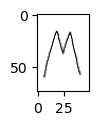

In [75]:
plotSample(images[10,:])

In [76]:
images_norm = images/255
print ('X.min()', images_norm.min())
print ('X.max()', images_norm.max())

X.min() 0.0
X.max() 1.0


In [77]:
images_norm.mean(axis=0).shape

(14800,)

In [78]:
images_norm.mean(axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

In [79]:
images_norm = images_norm - images_norm.mean(axis=0)

In [82]:
import numpy as np
cov = np.cov(images_norm, rowvar=False)

In [83]:
cov.shape

(14800, 14800)

In [84]:
U,S,V = np.linalg.svd(cov)

In [85]:
print (U.shape, S.shape)

(14800, 14800) (14800,)


In [86]:
print (np.diag(S))
print ('\nshape:', np.diag(S).shape)

[[3.65427963e+01 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.05220090e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.66594804e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.92327561e-15
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.72201589e-15 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 7.67784238e-16]]

shape: (14800, 14800)


In [87]:
epsilon = 0.1
images_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(images_norm.T).T

In [88]:
images_ZCA_rescaled = (images_ZCA - images_ZCA.min()) / (images_ZCA.max() - images_ZCA.min())
print ('min:', images_ZCA_rescaled.min())
print ('max:', images_ZCA_rescaled.max())

min: 0.0
max: 1.0


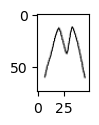

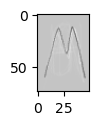

In [89]:
plotSample(images[12, :])
plotSample(images_ZCA_rescaled[12, :])

# Lab assigment 1.2

In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import mnist as mnist

In [28]:
def randomPermutation(array):
    #return np.random.permutation(len(array))
    return np.random.permutation(array)

In [33]:
import tensorflow as tf #solution found https://stackoverflow.com/questions/40690203/how-can-i-import-the-mnist-dataset-that-has-been-manually-downloaded
path = 'vecs.npy'
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path)
trainArray = (train_images, train_labels)

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [32]:
file = np.load("datasets/vecs.npy",allow_pickle=True)
parts = ["1_pos"]

embeddingArray = []
labelArray = []
for part in parts:
    for embedding in file.item()[part]:
        for label in file.item()[part][embedding]:
            embeddingArray.append(embedding)
            labelArray.append(label)
            
embeddingNpArray = np.array(embeddingArray)
labelNpArray = np.array(labelArray)

embeddingNpArray = randomPermutation(embeddingNpArray)
labelNpArray = randomPermutation(labelNpArray)

print(embeddingNpArray)
print(labelNpArray)

print(len(embeddingArray))
print(len(labelArray))

[6 3 7 ... 1 0 4]
[[-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 ... -0.0000000e+00
  -0.0000000e+00  7.8479576e+01]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 ...
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00  4.5702930e+01 ... -0.0000000e+00
  -0.0000000e+00 -0.0000000e+00]
 [-0.0000000e+00 -0.0000000e+00 -0.0000000e+00 ... -0.0000000e+00
  -0.0000000e+00 -3.9236357e-44]]
1258
1258


# Lab assignment 2

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import mnist

In [13]:
(Xtr, Ltr), (X_test, L_test)=mnist.load_data()

In [14]:
Xtr.shape

(60000, 28, 28)

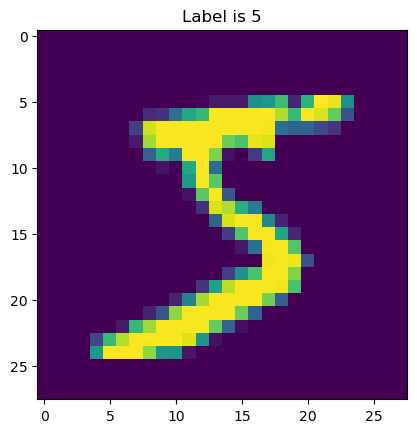

In [15]:
Image=Xtr[0,:,:]
Label=Ltr[0]


plt.title('Label is {Label}'.format(Label=Label))
plt.imshow(Image)

plt.show()
plt.close()

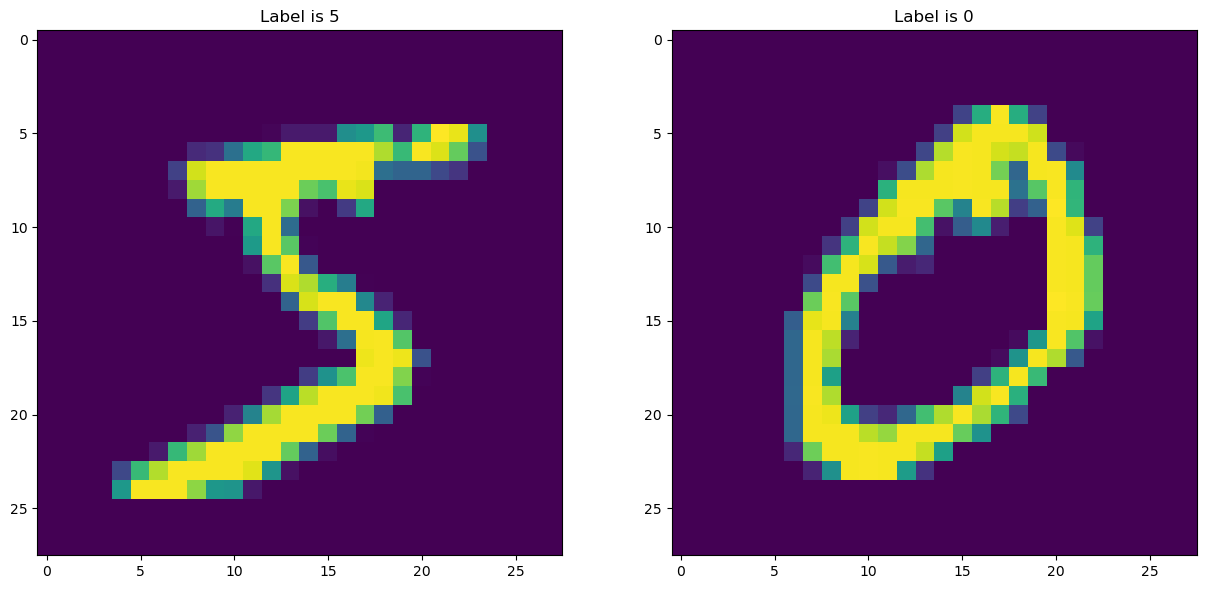

In [16]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,15))
ax0=plt.subplot(2,2,1)
ax1=plt.subplot(2,2,2)

Image=Xtr[0,:,:]
Label=Ltr[0]
Image1=Xtr[1,:,:]
Label1=Ltr[1]


ax0.set_title('Label is {Label}'.format(Label=Label))
ax0.imshow(Image)
ax1.set_title('Label is {Label}'.format(Label=Label1))
ax1.imshow(Image1)


plt.show()
plt.close()

In [17]:
28*28

784

In [18]:
#Traing phase
num_sample=500
Tr_set=Xtr[:num_sample,:,:]
Ltr_set=Ltr[:num_sample]

#Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2])

Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype(int)
Tr_set.shape

(500, 784)

In [19]:
def predict(X):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        #distances=np.sqrt(np.sum(np.square(Tr_set-X[i,:]), axis=1))
        
        min_index= np.argmin(distances)
        Lpred[i]=Ltr_set[min_index]
    return Lpred

In [20]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predicted=predict(Test_images)

print("Accuracy:", np.mean(Labels_predicted==L_test))

Accuracy: 0.811


L1: 0.2649 in accuracy
L2: 0.19 in accuracy
Bug: decomment Tr_set=Tr_set.reshape(num_sample,Tr_set.shape[1]*Tr_set.shape[2]).astype() and add int in astype which makes sure that it is handled like an int.
L1:0.811
L2:0.8294

In [21]:
from statistics import mode
def predictK(X,k):
    num_test=X.shape[0]
    Lpred=np.zeros(num_test, dtype=Ltr_set.dtype)
    
    for i in range(num_test):
        #distances=np.sum(np.abs(Tr_set-X[i,:]),axis=1)
        distances=np.sqrt(np.sum(np.square(Tr_set-X[i,:]), axis=1))
        
        min_indexes= np.argsort(distances)[:k]
        Lpred[i]=mode(Ltr_set[min_indexes])
    return Lpred

In [22]:
Test_images=X_test.reshape(X_test.shape[0],X_test.shape[1]* X_test.shape[2])
Labels_predictedK=predictK(Test_images, 8)

print("Accuracy:", np.mean(Labels_predictedK==L_test))

Accuracy: 0.7967


# Lab assignment 2.2

In [32]:
def predictCross(x, train, label, k):
    num = x.shape[0]
    Lpred = np.zeros(num, dtype=Ltr_set.dtype)
    for i in range(num):
        distance = np.sqrt(np.sum(np.square(Ytr_set-X[i,:]),axis=1))
        
        nearest_k = np.argsort(distance)[:k]
        
        Lpred[i]=mode(label[nearest_k])
    return Lpred

In [34]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [36]:
def random():
    sample=500
    random_train, random_label = unison_shuffled_copies(Xtr,Ltr)
    specific_train_random=random_train_data[:num_sample,:,:]
    specific_label_random=random_label_data[:num_sample]

    specific_train_random=Tr_set_random.reshape(sample,specific_train_random.shape[1]*specific_train_random.shape[2]).astype(int)
    specific_train_random.shape
    return Tr_set_random, Ltr_set_random

In [58]:
def crossValidation(train, label, folds, m):
    kfolds = KFold(n_splits=folds)
    accuracy = []
    k_accuracy = []
    
    for k in range(1, m):
        for t, validation in kfolds.split(train):
            specific_train = train[t]
            specific_val = train[validation]
            
            specific_label = label[t]
            specific_val_label = label[validation]

            label_predict = predictCrossKNN(specific_val, specific_train, specific_label, k)
            accuracy.append(np.mean(label_predict==specific_val_label))
        
        accuracy_mean = np.mean(accuracy)
        k_accuracy.append(accuracy_mean)
    return (k_accuracy)
        

In [59]:
k_3fold_value = []
fold = 3
for i in range(1,20):  
    train,label = randomData()
    k_accuracy=crossValidation(train,label,fold, 20)
    k_3fold_value.append(np.argmax(k_accuracy)+1)

print(k_3fold_value)

value = Counter(k_3fold_value)
value.most_common(1)[0][0]

acc = []
acc_value = predictK(Test_images, value.most_common(1)[0][0])
acc.append(np.mean(acc_value==L_test))
print('The accuracy of the best k value for 3 folds is ', acc[0])

[1, 5, 2, 4, 3, 1, 1, 1, 1, 1, 1, 3, 6, 3, 3, 6, 4, 4, 1]
The accuracy of the best k value for 3 folds is  0.8294


In [60]:
k_5fold_value = []
fold = 5
for i in range(1,20):  
    train,label = randomData()
    k_accuracy=crossValidation(train,label,fold, 20)
    k_5fold_value.append(np.argmax(k_accuracy)+1)

print(k_5fold_value)

value = Counter(k_5fold_value)
value.most_common(1)[0][0]

acc = []
acc_value = predictK(Test_images, value.most_common(1)[0][0])
acc.append(np.mean(acc_value==L_test))
print('The accuracy of the best k value for 5 folds is ', acc[0])

[4, 1, 1, 4, 4, 1, 1, 4, 3, 4, 4, 1, 2, 1, 1, 1, 4, 4, 1]
The accuracy of the best k value for 5 folds is  0.8294


In [61]:
k_10fold_value = []
fold = 10
for i in range(1,20):  
    train,label = randomData()
    k_accuracy=crossValidation(train,label,fold, 20)
    k_10fold_value.append(np.argmax(k_accuracy)+1)

print(k_10fold_value)

value = Counter(k_10fold_value)
value.most_common(1)[0][0]

acc = []
acc_value = predictK(Test_images, value.most_common(1)[0][0])
acc.append(np.mean(acc_value==L_test))
print('The accuracy of the best k value for 10 folds is ', acc[0])

[5, 4, 4, 2, 3, 1, 7, 1, 3, 8, 3, 3, 1, 3, 1, 1, 1, 1, 1]
The accuracy of the best k value for 10 folds is  0.8294


# Lab assigment 3.1-2

In [30]:
from sklearn import svm, datasets
from sklearn.svm import SVC
import numpy as np
from sklearn import metrics
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
#import tensorflow as tf

In [31]:
iris = load_iris()
x, y = iris.data, iris.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

#train_dataset = tf.data.Dataset.from_tensor_slices((x_train, x_train))
#test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))

print(x_train.shape)
print(x_test.shape)

(120, 4)
(30, 4)


In [32]:
ovrL = SVC(kernel='linear', decision_function_shape='ovr').fit(x_train,y_train)
ovrP = SVC(kernel='poly', decision_function_shape='ovr').fit(x_train,y_train)
ovrR = SVC(kernel='rbf', decision_function_shape='ovr').fit(x_train,y_train)
ovrS = SVC(kernel='sigmoid', decision_function_shape='ovr').fit(x_train,y_train)

In [33]:
ovoL = SVC(kernel='linear', decision_function_shape='ovo').fit(x_train,y_train)
ovoP = SVC(kernel='poly', decision_function_shape='ovo').fit(x_train,y_train)
ovoR = SVC(kernel='rbf', decision_function_shape='ovo').fit(x_train,y_train)
ovoS = SVC(kernel='sigmoid', decision_function_shape='ovo').fit(x_train,y_train)

In [39]:
labels = ["ovrL", "ovrP","ovrR", "ovrS","ovoL", "ovoP","ovoR", "ovoS"]
for i in labels:
    if(i=="ovrL"):#could be a switch but i am lazy
        clf = ovrL
    elif(i=="ovrP"):
        clf = ovrP
    elif(i=="ovrR"):
        clf = ovrR
    elif(i=="ovrS"):
        clf = ovrS
    elif(i=="ovoL"):
        clf = ovoL
    elif(i=="ovoP"):
        clf = ovoP
    elif(i=="ovoR"):
        clf = ovoR
    elif(i=="ovoS"):
        clf = ovoS
        
    
    predicted = clf.predict(x_test)
    f1 = f1_score(y_test,predicted, average='weighted')
    confusion_matrix = metrics.confusion_matrix(y_test, predicted)
    #cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    
    
    print(i)
    print("F1 score:", f1)
    print(confusion_matrix)

    #cm_display.plot()
    #plt.show()

ovrL
F1 score: 0.9658761528326745
[[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]
ovrP
F1 score: 0.9658761528326745
[[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]
ovrR
F1 score: 0.9671550671550672
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
ovrS
F1 score: 0.06666666666666667
[[ 0 13  0]
 [ 0  6  0]
 [ 0 11  0]]
ovoL
F1 score: 0.9658761528326745
[[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]
ovoP
F1 score: 0.9658761528326745
[[13  0  0]
 [ 0  5  1]
 [ 0  0 11]]
ovoR
F1 score: 0.9671550671550672
[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
ovoS
F1 score: 0.06666666666666667
[[ 0 13  0]
 [ 0  6  0]
 [ 0 11  0]]


The best kernel seems to be by a slim margin RBF and the f1 score does not change with ovo and ovr

# Lab assignment 3.3-4

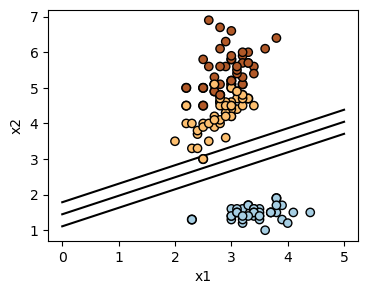

In [67]:
clf = ovrL
w = clf.coef_[0]

a = -w[1] / w[2]
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[2]
margin = 1 / np.sqrt(np.sum(ovrL.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")

plt.scatter(clf.support_vectors_[:, 1], clf.support_vectors_[:, 2], s=40,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(x_train[:, 1], x_train[:, 2], c=y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

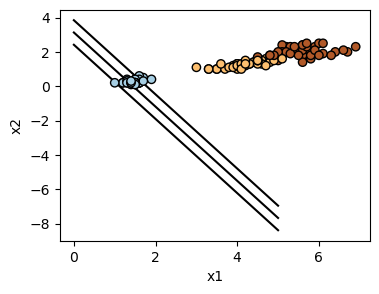

In [68]:
clf = ovrL
w = clf.coef_[0]

a = -w[2] / w[3]
xx = np.linspace(0, 5)
yy = a * xx - (clf.intercept_[0]) / w[3]
margin = 1 / np.sqrt(np.sum(ovrL.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k-")
plt.plot(xx, yy_up, "k-")

plt.scatter(clf.support_vectors_[:, 2], clf.support_vectors_[:, 3], s=20,
 facecolors="none", zorder=10, edgecolors="k")
plt.scatter(x_train[:, 2], x_train[:, 3], c=y_train, zorder=10, cmap=plt.cm.Paired,
 edgecolors="k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()